In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms
import seaborn as sns

In [4]:
url ="https://raw.githubusercontent.com/edyoda/Data-Scientist-program/master/Practice%20Problems/data/time_series_2019-ncov-Confirmed.csv"

In [5]:
covid_data = pd.read_csv(url)

In [6]:
covid_data.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
75,NaN,Bosnia and Herzegovina,43.9159,17.6791,0,0,0,0,0,0,...,18,24,25,26,38,63,89,93,126,126.0
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,19,20,29,29,37,42,50,67,100,100.0
86,NaN,Malta,35.9375,14.3754,0,0,0,0,0,0,...,18,21,30,38,38,53,64,73,90,90.0
478,NaN,Cape Verde,15.1111,-23.6167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
318,"Williamson County, TN",US,35.9179,-86.8622,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
202,Tibet,China,31.6927,88.0924,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
313,"Santa Clara County, CA",US,37.3541,-121.9552,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
87,NaN,Martinique,14.6415,-61.0242,0,0,0,0,0,0,...,9,9,15,16,19,23,32,32,37,37.0
349,"Skagit, WA",US,48.4242,-121.7114,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [8]:
covid_data.drop(columns = {'Lat','Long'}, inplace = True)

In [11]:
covid_data['Country/Region'].value_counts()

US           249
China         33
Canada        12
Australia      9
France         9
            ... 
Sri Lanka      1
Somalia        1
Norway         1
Barbados       1
Germany        1
Name: Country/Region, Length: 183, dtype: int64

In [12]:
covid_new_data = covid_data.groupby('Country/Region').sum()

In [20]:
covid_new_data = covid_new_data.T
covid_new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2020-01-22 to 2020-03-23
Columns: 183 entries, Afghanistan to Zimbabwe
dtypes: float64(183)
memory usage: 91.6 KB


In [21]:
covid_new_data.index = pd.to_datetime(covid_new_data.index)

Now we have to  plot the data with respect to the country

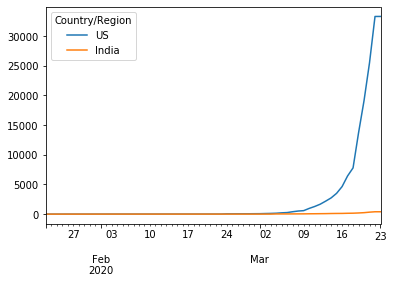

In [25]:
covid_new_data[['US','India']].plot()

In [43]:
top3 = list(covid_new_data.loc[covid_new_data.index[-1]].sort_values(ascending = False).index.values)
top3

['China',
 'Italy',
 'US',
 'Spain',
 'Germany',
 'Iran',
 'France',
 'Korea, South',
 'Switzerland',
 'United Kingdom',
 'Netherlands',
 'Belgium',
 'Austria',
 'Norway',
 'Sweden',
 'Portugal',
 'Brazil',
 'Denmark',
 'Canada',
 'Australia',
 'Malaysia',
 'Turkey',
 'Czechia',
 'Japan',
 'Israel',
 'Ireland',
 'Luxembourg',
 'Ecuador',
 'Pakistan',
 'Cruise Ship',
 'Poland',
 'Chile',
 'Finland',
 'Greece',
 'Thailand',
 'Iceland',
 'Indonesia',
 'Saudi Arabia',
 'Qatar',
 'Singapore',
 'Romania',
 'Slovenia',
 'India',
 'Philippines',
 'Russia',
 'Peru',
 'Bahrain',
 'Egypt',
 'Estonia',
 'South Africa',
 'Croatia',
 'Mexico',
 'Lebanon',
 'Panama',
 'Iraq',
 'Colombia',
 'Argentina',
 'Serbia',
 'Dominican Republic',
 'Algeria',
 'Armenia',
 'Kuwait',
 'Bulgaria',
 'Slovakia',
 'Taiwan*',
 'San Marino',
 'United Arab Emirates',
 'Latvia',
 'Uruguay',
 'Costa Rica',
 'Lithuania',
 'Hungary',
 'Bosnia and Herzegovina',
 'Morocco',
 'North Macedonia',
 'Andorra',
 'Vietnam',
 'Jordan'

In [35]:
top5 = list(covid_new_data.loc[covid_new_data.index[-1]].sort_values(ascending = False).index.values)
top5 =list(top5[:6])

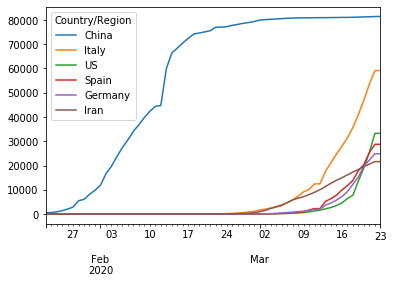

In [38]:
covid_new_data[top5].plot()

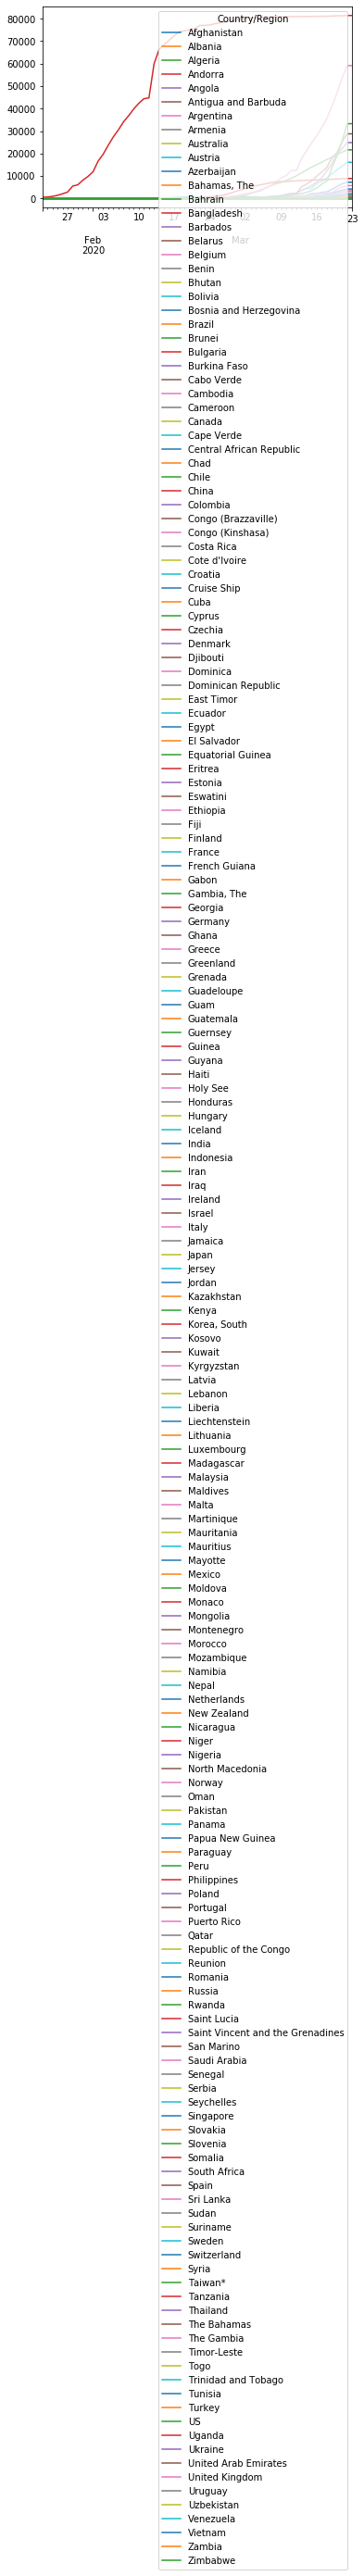

In [44]:
covid_new_data.plot()

In [46]:
deaths =  pd.read_csv('deaths.csv')
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,4
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3,4,4,4,7,9,11,15,17,17
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,Grenada,12.116500,-61.679000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,NaN,Mozambique,-18.665695,35.529562,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,NaN,Syria,34.802075,38.996815,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
deaths.drop(columns = ['Lat','Long'], inplace = True)

In [49]:
deaths = 

In [57]:
deaths

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,237
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,Diamond Princess,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Vietnam,Zambia,Zimbabwe,Canada,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/19/20,0,2,9,0,0,0,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0
3/20/20,0,2,11,0,0,0,3,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3/21/20,0,2,15,0,0,0,4,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3/22/20,1,2,17,1,0,0,4,0,0,6,...,0,0,0,1,0,0,0,0,0,0


NameError: name 'dropna' is not defined